In [275]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.stats import bernoulli, beta
from scipy.optimize import minimize
%matplotlib inline

In [807]:
def policy(a1, b1, a2, b2, method):
    """
    
    1. policy to determine which machine to select
    2. returns 0 or 1
    3. inputs (a1,a2,b1,b2) should be integers
    4. method should be either exploitation, exploration or proportion
    
    """
    
    if method == 'exploitation':
        return 0 if float(a1)/(a1+b1) > float(a2)/(a2+b2) else 1
    
    elif method == 'exploration':
        return bernoulli.rvs(0.5)
    
    elif method == 'thompson':
        return 0 if beta.rvs(a1,b1) > beta.rvs(a2,b2) else 1
    

In [808]:
"""
1. Need to make this into a function
2. Generalize code to work with > 2 machines
"""

# remove numpy warnings for indexing with non-integers
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    N = 100
    method = 'exploration'

    machine = np.empty(N)
    reward = np.empty(N)
    theta = np.array([[1,1], # machine 1
                      [1,1]  # machine 2
                     ])

    for t in range(N):

        machine[t] = policy(theta[0][0],
                            theta[0][1],
                            theta[1][0],
                            theta[1][1], method)

        # beta posterior expected value
        reward_theta = float(theta[machine[t]][0])/( theta[machine[t]][0] + theta[machine[t]][1] ) 

        reward[t] = bernoulli.rvs(reward_theta)

        if reward[t] == 1:
            theta[machine[t]][0] += 1 
        else:
            theta[machine[t]][1] += 1

    print "method: ", method
    print "number of times machine i selected: ", (np.sum(machine == 0),np.sum(machine == 1))
    print "total rewards: ", sum(reward)

method:  exploration
number of times machine i selected:  (48, 52)
total rewards:  56.0


In [809]:
# assume N = 3; 4**0 + 4**1 + 4**2 = 21 possibilities
# pvector is probability of choosing machine 1 (out of 2 machines)
# policy is a Bernoulli with probability pvec_i for each i

def infinite(x):
    
    return {(0,1,1,1,1) : bernoulli.rvs(x[0]),
            (1,2,1,1,1) : bernoulli.rvs(x[1]),
            (2,3,1,1,1) : bernoulli.rvs(x[2]),
            (2,2,2,1,1) : bernoulli.rvs(x[3]),
            (2,2,1,2,1) : bernoulli.rvs(x[4]),
            (2,2,1,1,2) : bernoulli.rvs(x[5]),
            (1,1,2,1,1) : bernoulli.rvs(x[6]),
            (2,2,2,1,1) : bernoulli.rvs(x[7]),
            (2,1,3,1,1) : bernoulli.rvs(x[8]),
            (2,1,2,2,1) : bernoulli.rvs(x[9]),
            (2,1,2,1,2) : bernoulli.rvs(x[10]),
            (1,1,1,2,1) : bernoulli.rvs(x[11]),
            (2,2,1,2,1) : bernoulli.rvs(x[12]),
            (2,1,2,2,1) : bernoulli.rvs(x[13]),
            (2,1,1,3,1) : bernoulli.rvs(x[14]),
            (2,1,1,2,2) : bernoulli.rvs(x[15]),
            (1,1,1,1,2) : bernoulli.rvs(x[16]),
            (2,2,1,1,2) : bernoulli.rvs(x[17]),
            (2,1,2,1,2) : bernoulli.rvs(x[18]),
            (2,1,1,2,2) : bernoulli.rvs(x[19]),
            (2,1,1,1,3) : bernoulli.rvs(x[20])
            }


In [825]:
def rewards(method):
    # remove numpy warnings for indexing with non-integers
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")

        N = 100
        #method = 'proportion'

        machine = np.empty(N)
        reward = np.empty(N)
        theta = np.array([[1,1], # machine 1
                          [1,1]  # machine 2
                         ])

        for t in range(N):

            machine[t] = policy(theta[0][0],
                                theta[0][1],
                                theta[1][0],
                                theta[1][1], method)

            # beta posterior expected value
            reward_theta = float(theta[machine[t]][0])/( theta[machine[t]][0] + theta[machine[t]][1] ) 

            reward[t] = bernoulli.rvs(reward_theta)

            if reward[t] == 1:
                theta[machine[t]][0] += 1 
            else:
                theta[machine[t]][1] += 1
            
        return sum(reward)

In [845]:
explore = []
exploit = []
thompson = []
for i in range(100):
    explore.append(rewards('exploration'))
    exploit.append(rewards('exploitation'))
    thompson.append(rewards('thompson'))

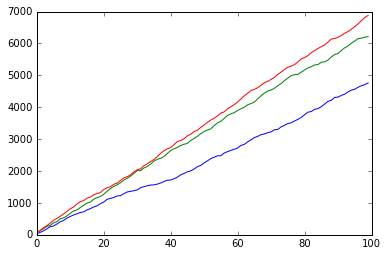

In [846]:
plt.plot(np.cumsum(explore))
plt.plot(np.cumsum(exploit))
plt.plot(np.cumsum(thompson))

In [770]:
rewards(running_total)

In [704]:
def calc_reward(x):

    # remove numpy warnings for indexing with non-integers
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")

        N = 3
   #     method = 'exploration'

        machine = np.empty(N)
        reward = np.empty(N)
        theta = np.array([[1,1], # machine 1
                          [1,1]  # machine 2
                         ])

        for t in range(N):

            idx = (t,theta[0][0],theta[0][1],theta[1][0],theta[1][1])

            machine[t] = infinite(x)[idx]

            # beta posterior expected value
            reward_theta = float(theta[machine[t]][0])/( theta[machine[t]][0] + theta[machine[t]][1] ) 

            reward[t] = 1/reward_theta*np.random.randn() + reward_theta

            if reward[t] > 0:
                theta[machine[t]][0] += 1 
            else:
                theta[machine[t]][1] += 1

#         print "method: ", method
#         print "number of times machine i selected: ", (np.sum(machine == 0),np.sum(machine == 1))
#         print "total rewards: ", sum(reward)
        
        return sum(reward)

In [719]:
space = [0.1,0.4,0.8]

def search_space(reward_dict):

    for i1 in space:
        for i2 in space:
            for i3 in space:
                for i4 in space:
                    for i5 in space:
#                    for i6 in space:
#                        for i7 in space:
#                            for i8 in space:
#                                 for i9 in space:
#                                     for i10 in space:
#                                         for i11 in space:
#                                             for i12 in space:
#                                                 for i13 in space:
#                                                     for i14 in space:
#                                                         for i15 in space:
#                                                             for i16 in space:
#                                                                 for i17 in space:
#                                                                     for i18 in space:
#                                                                         for i19 in space:
#                                                                             for i20 in space:
#                                                                                 for i21 in space:
                        x = [i1,i2,i3,i4,i5,.5,.5,.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5]#,i9,i10,i11,i12,i13,i14,i15,i16,i17,i18,i19,i20,i21]
                        try:
                            reward_dict[(i1,i2,i3,i4,i5)] += calc_reward(x)
                        except:
                            reward_dict[(i1,i2,i3,i4,i5)] = calc_reward(x)

                    #print x[:4], reward_dict[(i1,i2,i3,i4)]
    
#    return calc_reward(x)
    

In [720]:
reward_dict = {}
for i in range(100):
    search_space(reward_dict)

In [721]:
reward_dict

{(0.1, 0.1, 0.1, 0.1, 0.1): 162.0553744841707,
 (0.1, 0.1, 0.1, 0.1, 0.4): 155.80442303032046,
 (0.1, 0.1, 0.1, 0.1, 0.8): 199.95775178641003,
 (0.1, 0.1, 0.1, 0.4, 0.1): 170.89408965762871,
 (0.1, 0.1, 0.1, 0.4, 0.4): 108.4996039490775,
 (0.1, 0.1, 0.1, 0.4, 0.8): 208.26987896383949,
 (0.1, 0.1, 0.1, 0.8, 0.1): 169.71278576958525,
 (0.1, 0.1, 0.1, 0.8, 0.4): 185.8808162848506,
 (0.1, 0.1, 0.1, 0.8, 0.8): 93.029077202745526,
 (0.1, 0.1, 0.4, 0.1, 0.1): 160.81354295649913,
 (0.1, 0.1, 0.4, 0.1, 0.4): 152.35265087010598,
 (0.1, 0.1, 0.4, 0.1, 0.8): 139.37605814406177,
 (0.1, 0.1, 0.4, 0.4, 0.1): 150.96644741939033,
 (0.1, 0.1, 0.4, 0.4, 0.4): 145.26820587446957,
 (0.1, 0.1, 0.4, 0.4, 0.8): 171.71560837927299,
 (0.1, 0.1, 0.4, 0.8, 0.1): 234.85249530732511,
 (0.1, 0.1, 0.4, 0.8, 0.4): 167.42360107533781,
 (0.1, 0.1, 0.4, 0.8, 0.8): 180.83082696893391,
 (0.1, 0.1, 0.8, 0.1, 0.1): 128.86717418201729,
 (0.1, 0.1, 0.8, 0.1, 0.4): 118.87070105005562,
 (0.1, 0.1, 0.8, 0.1, 0.8): 130.04089496155

In [739]:
x0 = [0.7]*10 + [0.2]*5 + [0.9]*6

In [744]:
bnds = [(0,1) for i in range(21)]

In [745]:
calc_reward(x0)

3.3056151704780334

In [746]:
minimize(calc_reward, x0, method='TNC', bounds=bnds)

     fun: -1.0726143799827268
     jac: array([  9.10497613e+08,  -1.31980905e+08,   5.69694015e+07,
         3.95396747e+08,   1.53661600e+08,   2.59511887e+08,
         6.32752617e+08,   1.01014661e+09,   5.94241765e+08,
         6.77189604e+08,   9.56868825e+08,   9.31749466e+08,
         3.60279283e+08,   1.22225801e+09,   2.87802296e+08,
         5.44820350e+08,   2.28911261e+08,   8.61129440e+07,
         6.93234623e+08,   6.76889021e+08,   6.02840784e+08])
 message: 'Converged (|x_n-x_(n-1)| ~= 0)'
    nfev: 5
     nit: 1
  status: 2
 success: True
       x: array([ 0.7,  0.7,  0.7,  0.7,  0.7,  0.7,  0.7,  0.7,  0.7,  0.7,  0.2,
        0.2,  0.2,  0.2,  0.2,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9])